In [1]:
import pandas as pd
import seaborn as sns
import json

In [7]:
with open("../hunt.data", "r") as f:
    elements = [json.loads(line) for line in f]
df = pd.DataFrame(elements)
df["coop"] = df.policy.apply(lambda x: x[0])

df = pd.concat([df, pd.json_normalize(df["net"]).add_prefix("net_")], axis=1)
df = df.drop(["net"], axis=1)
df
#df

,policy,stag_payoff,steps,coop,net_edges,net_name,net_nodes,net_p,net_uid
0,"[0.4996582567691803, 0.5003417730331421]",4.0,100000,0.499658,46,rnd,32,0.100000,6luk9kK
1,"[0.49974992871284485, 0.5002500414848328]",4.0,80000,0.499750,134,rnd,32,0.255556,09U3K31
2,"[0.5003166794776917, 0.49968332052230835]",4.0,80000,0.500317,319,rnd,32,0.644444,hHvjHQe
3,"[0.5006917715072632, 0.4993082284927368]",4.0,100000,0.500692,262,rnd,32,0.488889,AZb4XF4
4,"[0.49888643622398376, 0.5011135935783386]",4.0,80000,0.498886,54,rnd,32,0.100000,bxiLrNs
...,...,...,...,...,...,...,...,...,...
315,"[0.5004221796989441, 0.49957776069641113]",4.0,100000,0.500422,1614,rnd,64,0.800000,7bj5zga
316,"[0.499604195356369, 0.5003957748413086]",4.0,100000,0.499604,1591,rnd,64,0.800000,nlDs7wZ
317,"[0.49962282180786133, 0.5003771781921387]",4.0,100000,0.499623,831,rnd,64,0.411111,GqPUCA1
318,"[0.5005475282669067, 0.49945247173309326]",4.0,100000,0.500548,1628,rnd,64,0.800000,aqTgdmK


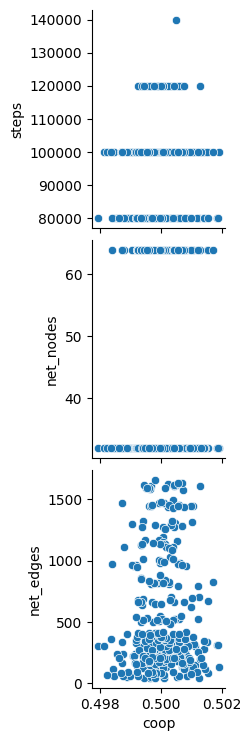

In [8]:
sns.pairplot(data=df, x_vars=["coop"], y_vars=["steps", "net_nodes", "net_edges"])

<AxesSubplot: xlabel='coop', ylabel='net_nodes'>

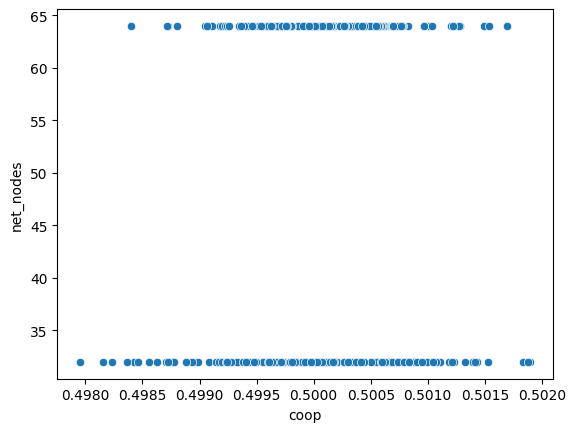

In [13]:
sns.scatterplot(data=df, x="coop", y="net_nodes")